In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Initial data observation and cleaning

In [246]:
df_train = pd.read_csv("train.csv", index_col = "Id")
df_test = pd.read_csv("test.csv", index_col = "Id")

df_train_55_79 = df_train[df_train.columns[55:-1]]
df_test_55_79 = df_test[df_test.columns[55:]]

display(df_train_55_79.shape, df_test_55_79.shape)

display(df_train_55_79.head(), df_test_55_79.head())

(1460, 24)

(1459, 24)

,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [14]:
display(df_train_55_79.info(), df_test_55_79.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Fireplaces     1460 non-null   int64  
 1   FireplaceQu    770 non-null    object 
 2   GarageType     1379 non-null   object 
 3   GarageYrBlt    1379 non-null   float64
 4   GarageFinish   1379 non-null   object 
 5   GarageCars     1460 non-null   int64  
 6   GarageArea     1460 non-null   int64  
 7   GarageQual     1379 non-null   object 
 8   GarageCond     1379 non-null   object 
 9   PavedDrive     1460 non-null   object 
 10  WoodDeckSF     1460 non-null   int64  
 11  OpenPorchSF    1460 non-null   int64  
 12  EnclosedPorch  1460 non-null   int64  
 13  3SsnPorch      1460 non-null   int64  
 14  ScreenPorch    1460 non-null   int64  
 15  PoolArea       1460 non-null   int64  
 16  PoolQC         7 non-null      object 
 17  Fence          281 non-null    object 
 18  MiscFeature  

None

None

### Train data set

In [248]:
# Rename the column names for better readability

new_col_names = {"Fireplaces": "fireplace_number",
               "FireplaceQu": "fireplace_quality",
               "GarageType": "garage_type",
               "GarageYrBlt": "garage_built_year",
               "GarageFinish":  "garage_interior_finish",
               "GarageCars": "garage_car_spaces",
               "GarageArea": "garage_size",
               "GarageQual": "garage_quality",
               "GarageCond": "garage_condition",
               "PavedDrive": "driveway_condition",
               "WoodDeckSF": "wood_deck_area",
               "OpenPorchSF": "porch_open_area",
               "EnclosedPorch": "porch_enclosed_area",
               "3SsnPorch": "porch_three_season_area",
               "ScreenPorch": "porch_screen_area",
               "PoolArea": "pool_area",
               "PoolQC": "pool_quality",
               "Fence": "fence_quality",
               "MiscFeature": "misc_feature",
               "MiscVal": "misc_feature_value",
               "MoSold": "sale_month",
               "YrSold": "sale_year",
               "SaleType": "sale_type",
               "SaleCondition": "sale_condition"}

df_train_55_79 = df_train_55_79.rename(new_col_names, axis = 1)
df_test_55_79 = df_test_55_79.rename(new_col_names, axis = 1)

display(df_train_55_79.head(1), df_test_55_79.head(1))

,fireplace_number,fireplace_quality,garage_type,garage_built_year,garage_interior_finish,garage_car_spaces,garage_size,garage_quality,garage_condition,driveway_condition,...,porch_screen_area,pool_area,pool_quality,fence_quality,misc_feature,misc_feature_value,sale_month,sale_year,sale_type,sale_condition
Id,,,,,,,,,,,,,,,,,,,,,
1,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal


,fireplace_number,fireplace_quality,garage_type,garage_built_year,garage_interior_finish,garage_car_spaces,garage_size,garage_quality,garage_condition,driveway_condition,...,porch_screen_area,pool_area,pool_quality,fence_quality,misc_feature,misc_feature_value,sale_month,sale_year,sale_type,sale_condition
Id,,,,,,,,,,,,,,,,,,,,,
1461,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


In [44]:
# Brief statistical check of numerical variables

display(df_train_55_79.describe())

,fireplace_number,garage_built_year,garage_car_spaces,garage_size,wood_deck_area,porch_open_area,porch_enclosed_area,porch_three_season_area,porch_screen_area,pool_area,misc_feature_value,sale_month,sale_year
count,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [46]:
# Brief statistical check of categorical variables

display(df_train_55_79.describe(include = object))

,fireplace_quality,garage_type,garage_interior_finish,garage_quality,garage_condition,driveway_condition,pool_quality,fence_quality,misc_feature,sale_type,sale_condition
count,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,6,3,5,5,3,3,4,4,9,6
top,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [77]:
# Create a list with names of numeric variables

cols_to_check = df_train_55_79.select_dtypes("number").columns.tolist()

print("Total columns:", len(cols_to_check))
cols_to_check

Total columns: 13


['fireplace_number',
 'garage_built_year',
 'garage_car_spaces',
 'garage_size',
 'wood_deck_area',
 'porch_open_area',
 'porch_enclosed_area',
 'porch_three_season_area',
 'porch_screen_area',
 'pool_area',
 'misc_feature_value',
 'sale_month',
 'sale_year']

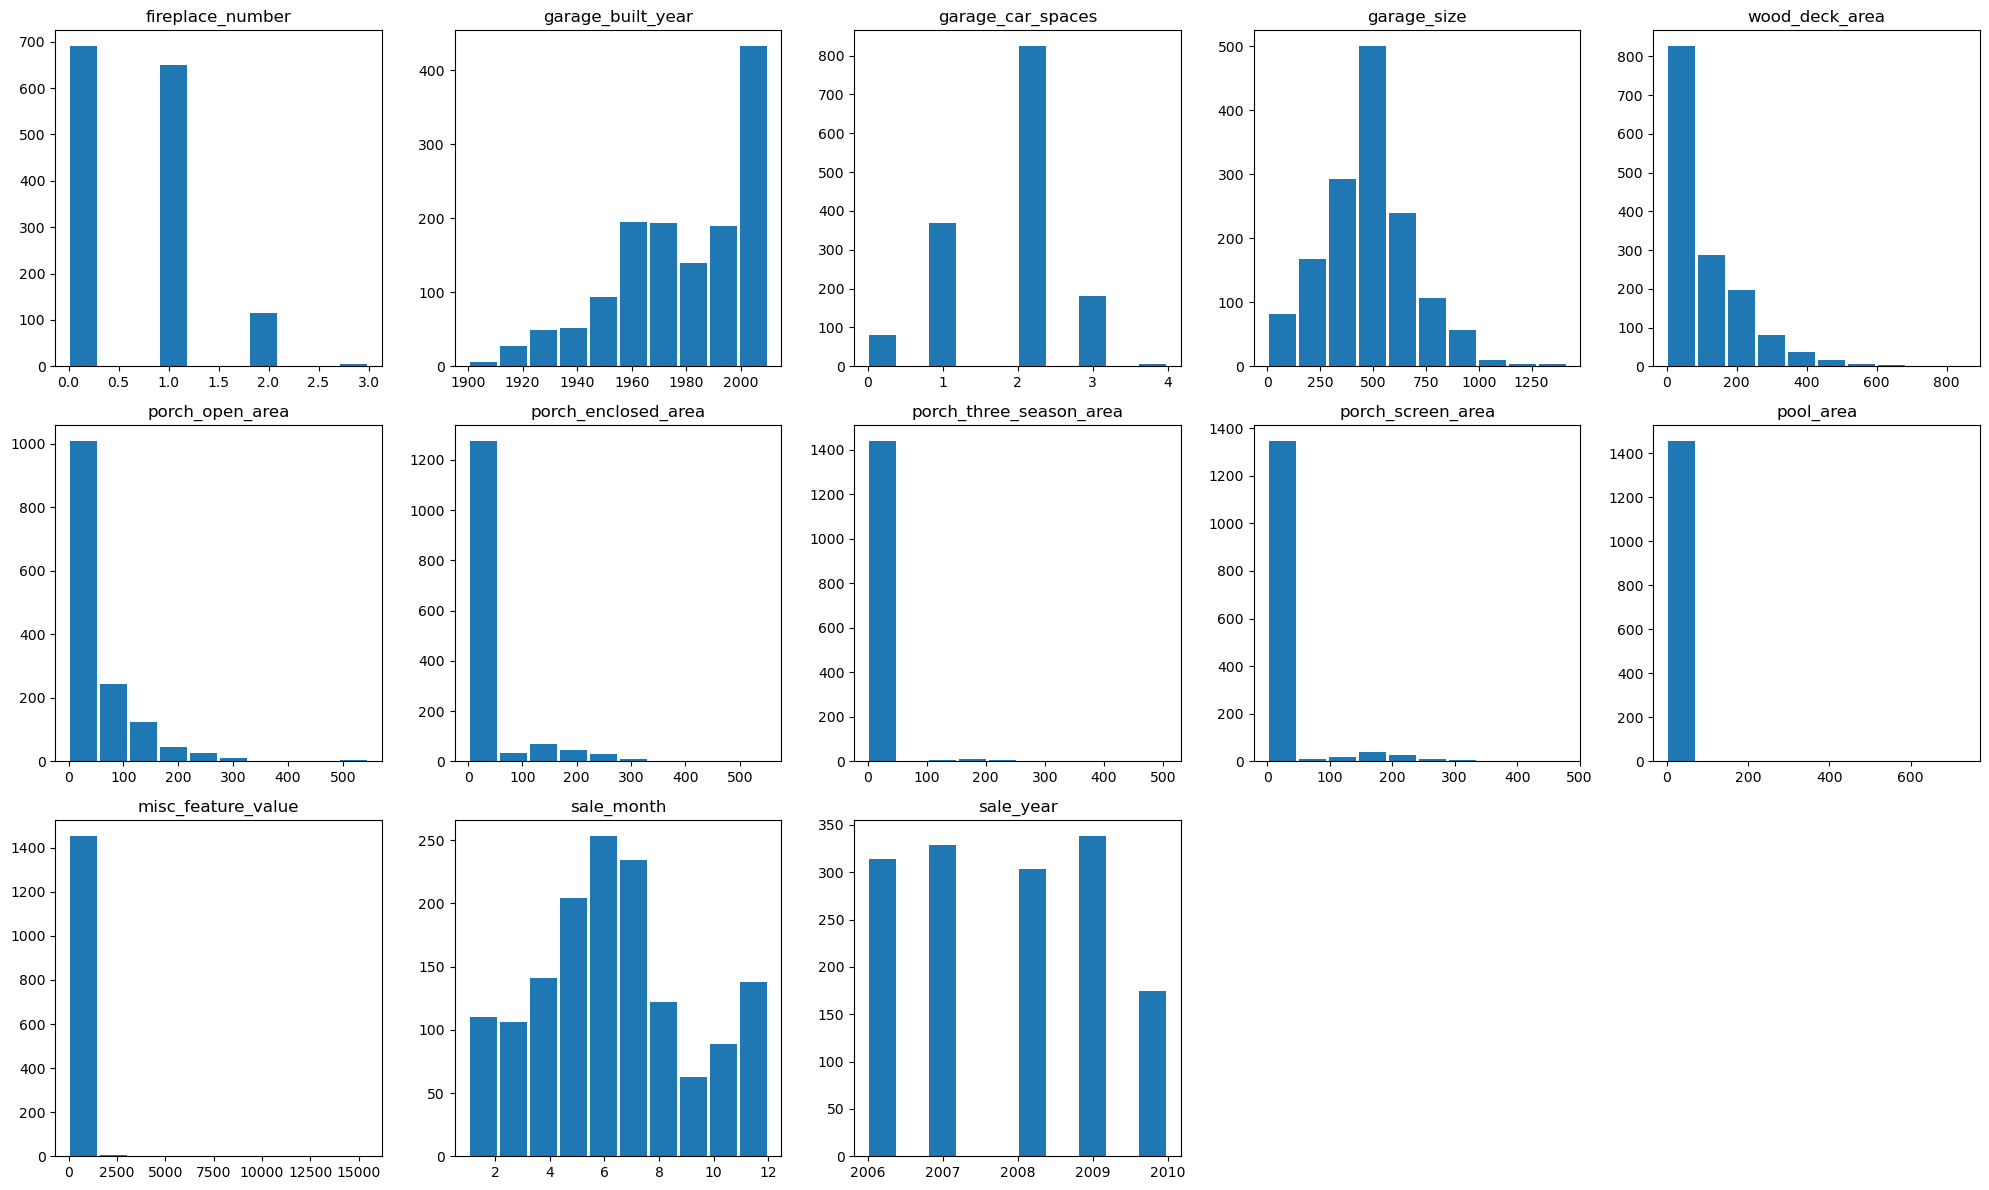

In [92]:
# Visualizatoin of distributions for numeric variables of train data set

fig, ax = plt.subplots(3, 5, figsize = (20, 12))

counter = 0
for i in range(3):
    for j in range(5):
        if counter < len(cols_to_check):
            ax[i, j].hist(df_train_55_79[cols_to_check[counter]], rwidth = 0.9)
            ax[i, j].set_title(cols_to_check[counter])
            counter += 1
        else:
            ax[i, j].set_axis_off()

fig.tight_layout()
plt.show()

#### Values to check, whether:
> 0 for *fireplace_number* matches with *fireplace_quality*  
> 0 for *garage_car_spaces* and *garage_size* matches with *garage_interior_finish*, *garage_quality* and *garage_condition*  
> 0 for *pool_area matches* with *pool_quality*  
> 0 for *misc_feature_value* matches with *misc_feature*

In [137]:
# Plausibility check betwenn numerical and categorical variables for the same property attribute

print("fireplace_number = 0 corresponds with",
      df_train_55_79[df_train_55_79.fireplace_number == 0].fireplace_quality.unique().tolist(),
      "in fireplace_quality")

gar_list = ["garage_interior_finish", "garage_quality", "garage_condition"]

for gar_1 in ["garage_car_spaces", "garage_size"]:
    for gar_2 in gar_list:
        print(gar_1, " = 0 corresponds with",
              df_train_55_79[df_train_55_79[gar_1] == 0][gar_2].unique().tolist(),
              "in", gar_2)

print("pool_area = 0 corresponds with",
      df_train_55_79[df_train_55_79.pool_area == 0].pool_quality.unique().tolist(),
      "in pool_quality")

print("misc_feature_value = 0 corresponds with",
      df_train_55_79[df_train_55_79.misc_feature_value == 0].misc_feature.unique().tolist(),
      "in misc_feature")

fireplace_number = 0 corresponds with [nan] in fireplace_quality
garage_car_spaces  = 0 corresponds with [nan] in garage_interior_finish
garage_car_spaces  = 0 corresponds with [nan] in garage_quality
garage_car_spaces  = 0 corresponds with [nan] in garage_condition
garage_size  = 0 corresponds with [nan] in garage_interior_finish
garage_size  = 0 corresponds with [nan] in garage_quality
garage_size  = 0 corresponds with [nan] in garage_condition
pool_area = 0 corresponds with [nan] in pool_quality
misc_feature_value = 0 corresponds with [nan, 'Othr', 'Shed'] in misc_feature


> We see, that in addition to "nan" some of the entries for misc_features "Othr" and "Shed" also have misc_feature_value = 0, which is questionable,  at least in case of "Shed", whether a value is missing here or whether it is OK, since it stands for sheds over 100 SF.

### Test data set

In [45]:
# Brief statistical check of numerical variables

display(df_test_55_79.describe())

,fireplace_number,garage_built_year,garage_car_spaces,garage_size,wood_deck_area,porch_open_area,porch_enclosed_area,porch_three_season_area,porch_screen_area,pool_area,misc_feature_value,sale_month,sale_year
count,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [47]:
# Brief statistical check of categorical variables

display(df_test_55_79.describe(include = object))

,fireplace_quality,garage_type,garage_interior_finish,garage_quality,garage_condition,driveway_condition,pool_quality,fence_quality,misc_feature,sale_type,sale_condition
count,729,1383,1381,1381,1381,1459,3,290,51,1458,1459
unique,5,6,3,4,5,3,2,4,3,9,6
top,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,364,853,625,1293,1328,1301,2,172,46,1258,1204


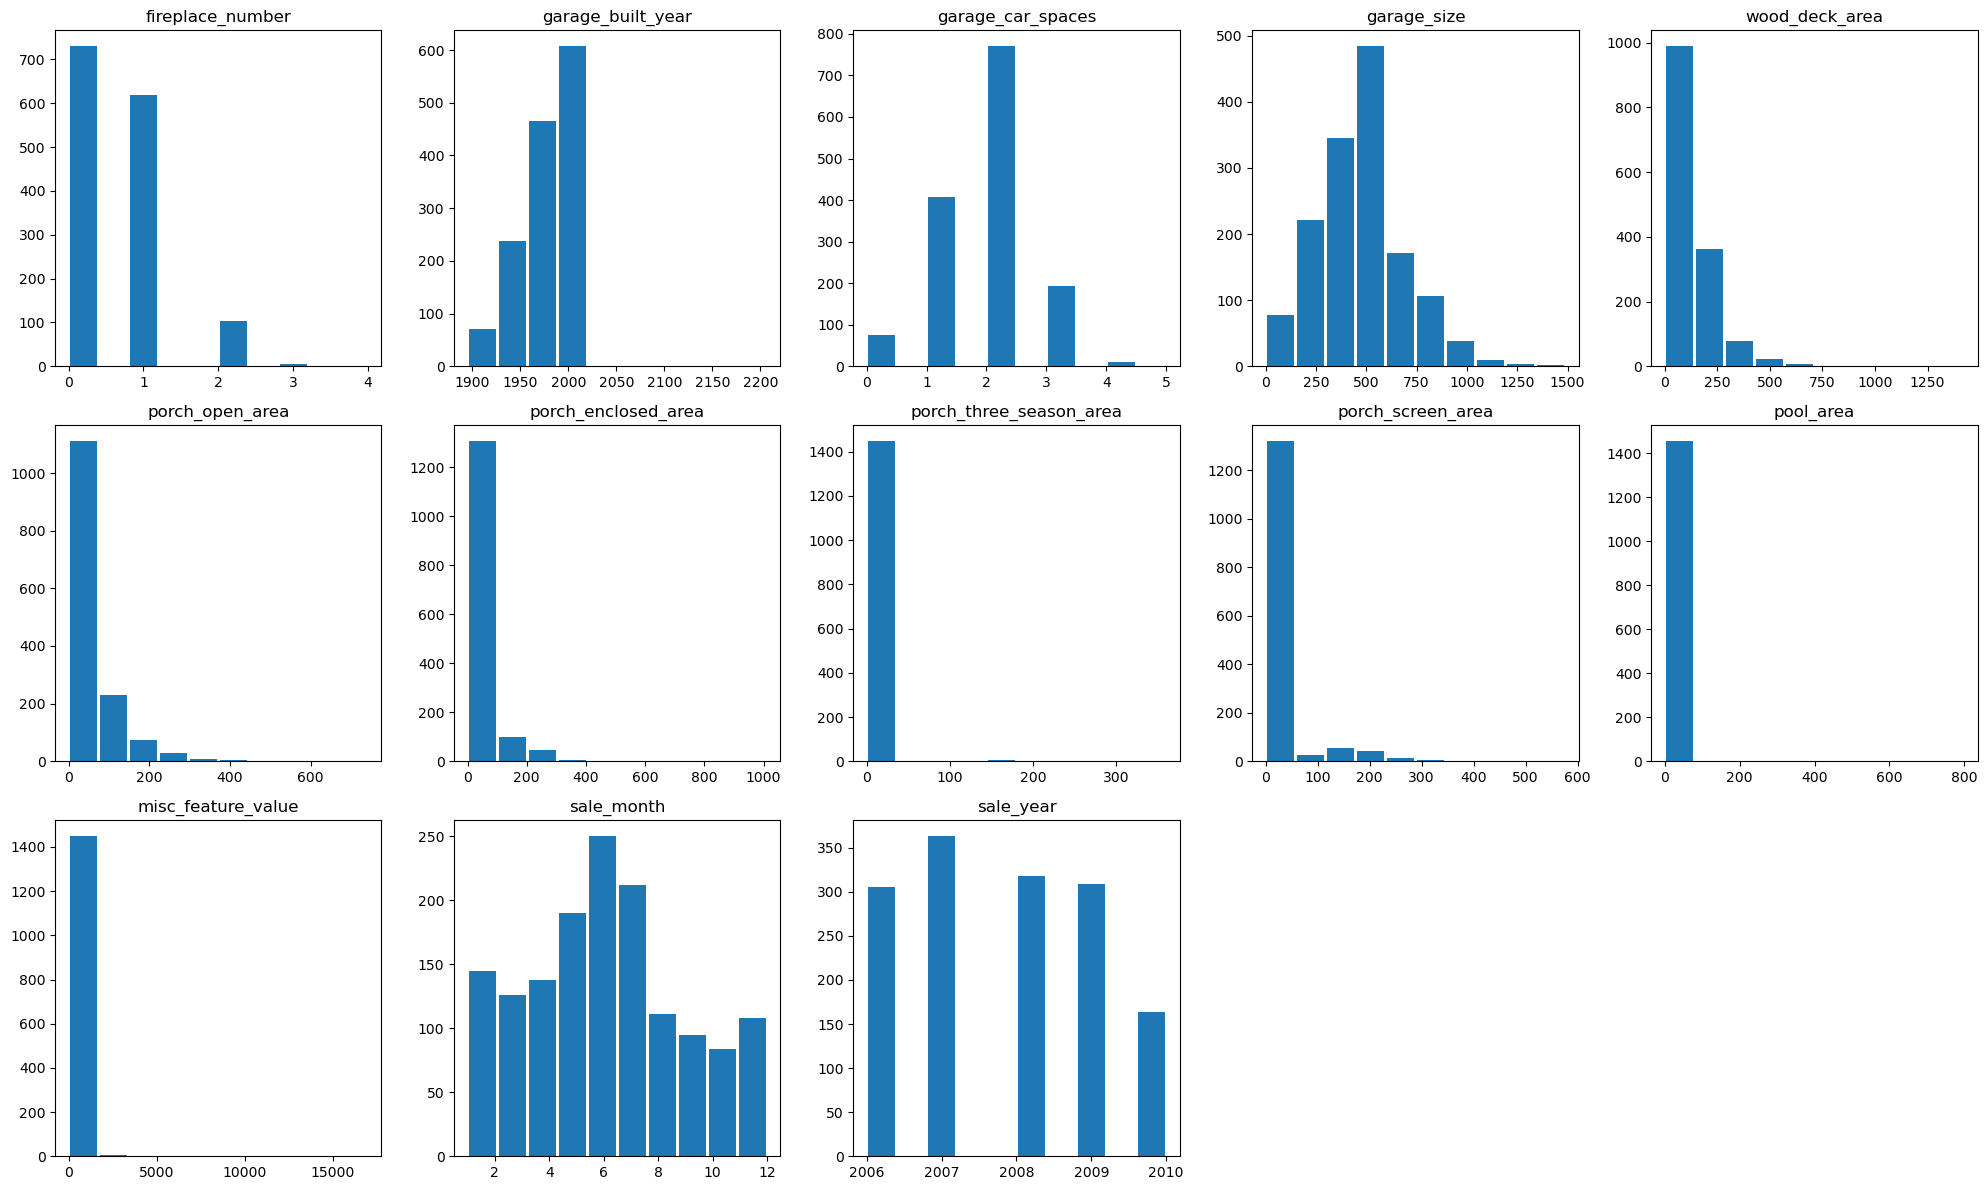

In [93]:
# Visualizatoin of distributions for numeric variables of test data set

fig, ax = plt.subplots(3, 5, figsize = (20, 12))

counter = 0
for i in range(3):
    for j in range(5):
        if counter < len(cols_to_check):
            ax[i, j].hist(df_test_55_79[cols_to_check[counter]], rwidth = 0.9)
            ax[i, j].set_title(cols_to_check[counter])
            counter += 1
        else:
            ax[i, j].set_axis_off()

fig.tight_layout()
plt.show()

In [192]:
# Check whether there are more outliers in garage_built_year

display(np.sort(df_test_55_79.garage_built_year.unique()))

array([1895., 1896., 1900., 1910., 1915., 1916., 1917., 1918., 1919.,
       1920., 1921., 1922., 1923., 1924., 1925., 1926., 1927., 1928.,
       1930., 1932., 1934., 1935., 1936., 1937., 1938., 1939., 1940.,
       1941., 1942., 1943., 1945., 1946., 1947., 1948., 1949., 1950.,
       1951., 1952., 1953., 1954., 1955., 1956., 1957., 1958., 1959.,
       1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968.,
       1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977.,
       1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986.,
       1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995.,
       1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004.,
       2005., 2006., 2007., 2008., 2009., 2010., 2207.,   nan])

#### Values to check, whether:
> 0 for *fireplace_number* matches with *fireplace_quality*  
> 0 for *garage_car_spaces* and *garage_size* matches with *garage_type*, *garage_interior_finish*, *garage_quality* and *garage_condition*  
> 0 for *pool_area matches* with *pool_quality*  
> 0 for *misc_feature_value* matches with *misc_feature*

#### To correct:
> 2207.000000 for *garage_built_year*

In [174]:
# Plausibility check betwenn numerical and categorical variables for the same property attribute

print("fireplace_number = 0 corresponds with",
      df_test_55_79[df_test_55_79.fireplace_number == 0].fireplace_quality.unique().tolist(),
      "in fireplace_quality")

gar_list = ["garage_type", "garage_interior_finish", "garage_quality", "garage_condition"]

for gar_1 in ["garage_car_spaces", "garage_size"]:
    for gar_2 in gar_list:
        print(gar_1, " = 0 corresponds with",
              df_test_55_79[df_test_55_79[gar_1] == 0][gar_2].unique().tolist(),
              "in", gar_2)

print("pool_area = 0 corresponds with",
      df_test_55_79[df_test_55_79.pool_area == 0].pool_quality.unique().tolist(),
      "in pool_quality")

print("misc_feature_value = 0 corresponds with",
      df_test_55_79[df_test_55_79.misc_feature_value == 0].misc_feature.unique().tolist(),
      "in misc_feature")

fireplace_number = 0 corresponds with [nan] in fireplace_quality
garage_car_spaces  = 0 corresponds with [nan] in garage_type
garage_car_spaces  = 0 corresponds with [nan] in garage_interior_finish
garage_car_spaces  = 0 corresponds with [nan] in garage_quality
garage_car_spaces  = 0 corresponds with [nan] in garage_condition
garage_size  = 0 corresponds with [nan] in garage_type
garage_size  = 0 corresponds with [nan] in garage_interior_finish
garage_size  = 0 corresponds with [nan] in garage_quality
garage_size  = 0 corresponds with [nan] in garage_condition
pool_area = 0 corresponds with [nan] in pool_quality
misc_feature_value = 0 corresponds with [nan, 'Shed'] in misc_feature


> For the test set we have the same issue with misc_feature "Shed", which misc_feature_value = 0

#### Correction of the outlier in garage_built_year

In [219]:
# Data sample with outlier in garage_built_year and garage relevant columns

display(df_test_55_79[df_test_55_79.garage_built_year == df_test_55_79.garage_built_year.max()].filter(regex = ("garage*")))

,garage_type,garage_built_year,garage_interior_finish,garage_car_spaces,garage_size,garage_quality,garage_condition
Id,,,,,,,
2593,Attchd,2207.0,RFn,2.0,502.0,TA,TA


In [218]:
# List of values from garage relevant columns of the sample with outlier

garage_filter = df_test_55_79[df_test_55_79.garage_built_year == df_test_55_79.garage_built_year.max()].\
                filter(regex = ("^garage_(?!built_year)")).values.flatten().tolist()

garage_filter

['Attchd', 'RFn', 2.0, 502.0, 'TA', 'TA']

In [214]:
# List of garage relevant column names

garage_cols = df_test_55_79.filter(regex = ("^garage_(?!built_year)")).columns.tolist()

garage_cols

['garage_type',
 'garage_interior_finish',
 'garage_car_spaces',
 'garage_size',
 'garage_quality',
 'garage_condition']

In [220]:
# Filter for a most frequent value in the garage_built_year with the same parameters as the sample with the outlier
# (there is only one such an entry)

correct_garage_built_year = df_test_55_79[(df_test_55_79[garage_cols[0]] == garage_filter[0]) &
                                          (df_test_55_79[garage_cols[1]] == garage_filter[1]) &
                                          (df_test_55_79[garage_cols[2]] == garage_filter[2]) &
                                          (df_test_55_79[garage_cols[3]] == garage_filter[3]) &
                                          (df_test_55_79[garage_cols[4]] == garage_filter[4]) &
                                          (df_test_55_79[garage_cols[5]] == garage_filter[5]) &
                                          (df_test_55_79.garage_built_year != df_test_55_79.garage_built_year.max())].garage_built_year.mode()[0]

correct_garage_built_year

1969.0

In [249]:
# Correct the outlier in the data set

outlier_index = df_test_55_79[df_test_55_79.garage_built_year == df_test_55_79.garage_built_year.max()].filter(regex = ("garage*")).index[0]

print(f"Old value for garage_built_year at the index {outlier_index}: {df_test_55_79.loc[outlier_index, "garage_built_year"]}")

df_test_55_79.loc[outlier_index, "garage_built_year"] = correct_garage_built_year

print(f"New value for garage_built_year at the index {outlier_index}: {df_test_55_79.loc[outlier_index, "garage_built_year"]}")

Old value for garage_built_year at the index 2593: 2207.0
New value for garage_built_year at the index 2593: 1969.0


## Data Description (based on the data_description.txt file)
* Fireplaces: Number of fireplaces  > *"fireplace_number" / numeric / integer*
* FireplaceQu: Fireplace quality > *"fireplace_quality" / categorical / ordinal*

>       Ex	Excellent - Exceptional Masonry Fireplace > (5)
>       Gd	Good - Masonry Fireplace in main level > (4)
>       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement > (3)
>       Fa	Fair - Prefabricated Fireplace in basement > (2)
>       Po	Poor - Ben Franklin Stove > (1)
>       NA	No Fireplace > (0)
		
* GarageType: Garage location > *"garage_type" / categorical / non ordinal*
		
>       2Types	More than one type of garage > (6)
>       Basment	Basement Garage > (5)
>       BuiltIn	Built-In (Garage part of house - typically has room above garage) > (4)
>       Attchd	Attached to home > (3)
>       Detchd	Detached from home > (2)
>       CarPort	Car Port > (1)
>       NA		No Garage > (0)
		
* GarageYrBlt: Year garage was built > *"garage_built_year" / numeric / integer*
		
* GarageFinish: Interior finish of the garage > *"garage_interior_finish" / categorical / ordinal*

>       Fin	Finished > (3)
>       RFn	Rough Finished > (2)	
>       Unf	Unfinished > (1)
>       NA	No Garage > (0)
		
* GarageCars: Size of garage in car capacity > *"garage_car_spaces" / numericla / integer*

* GarageArea: Size of garage in square feet > *"garage_size" / numerical / integer*

* GarageQual: Garage quality > *"garage_quality" / categorical / ordinal*

>       Ex	Excellent > (5) 
>       Gd	Good > (4)
>       TA	Typical/Average > (3)
>       Fa	Fair > (2)
>       Po	Poor > (1)
>       NA	No Garage > (0)
		
* GarageCond: Garage condition > *"garage_condition" / categorical / ordinal*

>       Ex	Excellent > (5)
>       Gd	Good > (4)
>       TA	Typical/Average > (3)
>       Fa	Fair > (2)
>       Po	Poor > (1)
>       NA	No Garage > (0)
		
* PavedDrive: Paved driveway > *"driveway_condition" / categorical / ordinal*

>       Y	Paved > (3)
>       P	Partial Pavement > (2)
>       N	Dirt/Gravel > (1)
		
* WoodDeckSF: Wood deck area in square feet > *"wood_deck_area" / numeric / integer*

* OpenPorchSF: Open porch area in square feet > *"porch_open_area" / numeric / integer*

* EnclosedPorch: Enclosed porch area in square feet > *"porch_enclosed_area" / numeric / integer*

* 3SsnPorch: Three season porch area in square feet > *"porch_three_season_area" / numeric / integer*

* ScreenPorch: Screen porch area in square feet > *"porch_screen_area" / numeric / integer*

* PoolArea: Pool area in square feet > *"pool_area" / numeric / integer*

* PoolQC: Pool quality > *"pool_quality" / categorical / ordinal*
		
>       Ex	Excellent > (4)
>       Gd	Good > (3)
>       TA	Average/Typical > (2)
>       Fa	Fair > (1)
>       NA	No Pool > (0)
		
* Fence: Fence quality > *"fence_quality" / categorical / ordinal*
		
>       GdPrv	Good Privacy > (4)
>       MnPrv	Minimum Privacy > (3)
>       GdWo	Good Wood > (2)
>       MnWw	Minimum Wood/Wire > (1)
>       NA	No Fence > (0)
	
* MiscFeature: Miscellaneous feature not covered in other categories > *"misc_feature" / categorical / non ordinal*
		
>       Elev	Elevator > (5)
>       Gar2	2nd Garage (if not described in garage section) > (4)
>       Othr	Other > (3)
>       Shed	Shed (over 100 SF) > (2)
>       TenC	Tennis Court > (1)
>       NA	None > (0)
		
* MiscVal: $Value of miscellaneous feature > *"misc_feature_value" / numeric / integer*

* MoSold: Month Sold (MM) > *"sale_month" / numeric / integer*

* YrSold: Year Sold (YYYY) > *"sale_year" / numeric / integer*

* SaleType: Type of sale > *"sale_type" / categorical / non ordinal*
		
>       WD 	Warranty Deed - Conventional > (10)
>       CWD	Warranty Deed - Cash > (9)
>       VWD	Warranty Deed - VA Loan > (8)
>       New	Home just constructed and sold > (7)
>       COD	Court Officer Deed/Estate > (6)
>       Con	Contract 15% Down payment regular terms > (5)
>       ConLw	Contract Low Down payment and low interest > (4)
>       ConLI	Contract Low Interest > (3)
>       ConLD	Contract Low Down > (2)
>       Oth	Other > (1)
		
* SaleCondition: Condition of sale > *"sale_condition" / categorical / non ordinal*

>       Normal	Normal Sale > (6)
>       Abnorml	Abnormal Sale -  trade, foreclosure, short sale > (5)
>       AdjLand	Adjoining Land Purchase > (4)
>       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit > (3)
>       Family	Sale between family members > (2)
>       Partial	Home was not completed when last assessed (associated with New Homes) > (1)

### Therefore "true NaN" values are expected in variables:
> Fireplaces: Number of fireplcases (*fireplace_number*)  
> GarageYrBlt: Year garage was built (*garage_built_year*)  
> GarageCars: Size of garage in car capacity (*garage_car_spaces*)  
> GarageArea: Size of garage in square feet (*garage_size*)  
> PavedDrive: Paved driveway (*driveway_condition*)  
> WoodDeckSF: Wood deck area in square feet (*wood_deck_area*)  
> OpenPorchSF: Open porch area in square feet (*porch_open_area*)  
> EnclosedPorch: Enclosed porch area in square feet (*porch_enclosed_area*)  
> 3SsnPorch: Three season porch area in square feet (*porch_three_season_area*)  
> ScreenPorch: Screen porch area in square feet (*porch_screen_area*)  
> PoolArea: Pool area in square feet (*pool_area*)  
> MiscVal: $Value of miscellaneous feature (*misc_feature_value*)  
> MoSold: Month Sold (MM) (*sale_month*)  
> YrSold: Year Sold (YYYY) (*sale_year*)  
> SaleType: Type of sale (*sale_type*)  
> SaleCondition: Condition of sale (*sale_condition*)

### Check for real NaN

In [30]:
# Create a list of variables, where "true NaNs" are considered to appear

check_nan_cols = ["fireplace_number",
                  "garage_built_year",
                  "garage_car_spaces",
                  "garage_size",
                  "driveway_condition",
                  "wood_deck_area",
                  "porch_open_area",
                  "porch_enclosed_area",
                  "porch_three_season_area",
                  "porch_screen_area",
                  "pool_area",
                  "misc_feature_value",
                  "sale_month",
                  "sale_year",
                  "sale_type",
                  "sale_condition"]

print("Train set:\n", df_train_55_79[check_nan_cols].isna().sum()[df_train_55_79[check_nan_cols].isna().sum() != 0], "\n\n" \
      "Test set:\n", df_test_55_79[check_nan_cols].isna().sum()[df_test_55_79[check_nan_cols].isna().sum() != 0])

Train set:
 garage_built_year    81
dtype: int64 

Test set:
 garage_built_year    78
garage_car_spaces     1
garage_size           1
sale_type             1
dtype: int64


We have
> 81 missing values for garage_built_year in the train set and 78 in the test set  
> 1 missing value for garage_car_spaces, garage_size and sale_type each in the test set.  

In [ ]:
# In order to find a most appropriate built year for the garage,
# I check the other attributes of garages and compare them with their built year.



In [41]:
np.sort(df_train_55_79.garage_built_year.unique())

array([1900., 1906., 1908., 1910., 1914., 1915., 1916., 1918., 1920.,
       1921., 1922., 1923., 1924., 1925., 1926., 1927., 1928., 1929.,
       1930., 1931., 1932., 1933., 1934., 1935., 1936., 1937., 1938.,
       1939., 1940., 1941., 1942., 1945., 1946., 1947., 1948., 1949.,
       1950., 1951., 1952., 1953., 1954., 1955., 1956., 1957., 1958.,
       1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967.,
       1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976.,
       1977., 1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985.,
       1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994.,
       1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003.,
       2004., 2005., 2006., 2007., 2008., 2009., 2010.,   nan])

In [250]:
true_nan_cols_test = ["garage_built_year",
                      "garage_car_spaces",
                      "garage_size",
                      "sale_type"]

for col in true_nan_cols_test:
    print(f"{col}: \n {np.sort(df_test_55_79[col].unique())}")

garage_built_year: 
 [1895. 1896. 1900. 1910. 1915. 1916. 1917. 1918. 1919. 1920. 1921. 1922.
 1923. 1924. 1925. 1926. 1927. 1928. 1930. 1932. 1934. 1935. 1936. 1937.
 1938. 1939. 1940. 1941. 1942. 1943. 1945. 1946. 1947. 1948. 1949. 1950.
 1951. 1952. 1953. 1954. 1955. 1956. 1957. 1958. 1959. 1960. 1961. 1962.
 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974.
 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986.
 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998.
 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010.
   nan]
garage_car_spaces: 
 [ 0.  1.  2.  3.  4.  5. nan]
garage_size: 
 [   0.  100.  160.  162.  164.  180.  184.  185.  195.  200.  205.  207.
  209.  210.  215.  216.  217.  220.  224.  225.  226.  228.  230.  231.
  234.  240.  242.  246.  249.  250.  252.  253.  256.  257.  258.  260.
  263.  264.  265.  266.  267.  270.  272.  273.  275.  276.  280.  281.
  283.  286.  287.  288.  292

TypeError: '<' not supported between instances of 'float' and 'str'

## Encoding the categorical variables

In [65]:
df_55_79 = df_55_79.fillna(0)

display(df_55_79.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fireplace_number         1460 non-null   int64  
 1   fireplace_quality        1460 non-null   object 
 2   garage_type              1460 non-null   object 
 3   garage_built_year        1460 non-null   float64
 4   garage_interior_finish   1460 non-null   object 
 5   garage_car_spaces        1460 non-null   int64  
 6   garage_size              1460 non-null   int64  
 7   garage_quality           1460 non-null   object 
 8   garage_condition         1460 non-null   object 
 9   driveway_condition       1460 non-null   object 
 10  wood_deck_area           1460 non-null   int64  
 11  porch_open_area          1460 non-null   int64  
 12  porch_enclosed_area      1460 non-null   int64  
 13  porch_three_season_area  1460 non-null   int64  
 14  porch_screen_area        1460

None

In [ ]:
# display(df.reaplace({"fireplace_quality": {"Po": 1},
#                      "garage_type": {"CarPort": 1},
#                      "garage_interior_finish": {"Unf": 1},
#                      "garage_quality": {"Po": 1},
#                      "garage_condition": {"Po": 1},
#                      "driveway_condition": {"N": 1},
#                      "pool_quality": {"Fa": 1},
#                      "fence_quality": {"MnWw": 1},
#                      "misc_feature": {"TenC": 1},
#                      "sale_type": {"Oth": 1},
#                      "sale_condition": {"Partial": 1}})

In [52]:
display(df[df.garage_quality != df.garage_condition][["garage_quality", "garage_condition"]])

,garage_quality,garage_condition
Id,,
9,Fa,TA
10,Gd,TA
30,Fa,TA
31,TA,Fa
40,NaN,NaN
...,...,...
1444,Fa,Po
1449,Fa,TA
1450,NaN,NaN
